# Ismerkedés a robotkarral

A mérés megkezdése előtt a munkaterületről távolítson el minden felesleges tárgyat.
Kapcsolja be a robot tápegységét, indítsa el a `dosemu` programot.
Csatolja fel a programkönyvtárat, majd indítsa el a robotvezérlő programot és válassza a motortesztet.

```dos
mount
```

**Figyelem!** A lézert mindig kapcsolja ki, ha az nem a robotkar alaplapja felé néz! Ha a mérés során a robotkar valaminek nekiütközik azonnal le kell kapcsolni a robot tápfeszültségét!

# 1. A biztonsági zóna vizsgálata - 4 pont

A robot szabad mozgásterének feltérképezése.
A vezérlőprogramban állítsuk a robotot *online* módra.

Középállásba az alábbi paranccsal vezérelheti a robotkart:

```
PTP 128 128 128 128 128 128
```

Végezze el az alábbi három kísérletet:
* álljon középállásba, a 2. csukló értékét növelje, amíg a robot nem jelez hibát,
* álljon középállásba, állítsa a 4. csuklót egyik szélső helyzetbe (0), és a 2. csukló értékét növelje, amíg a robot nem jelez hibát,
* álljon középállásba, állítsa a 4. csuklót másik szélső helyzetbe (255), és a 2. csukló értékét növelje, amíg a robot nem jelez hibát.

A hiba azt jelzi, hogy a robotkar elérte a biztonsági zóna határát. 
Az `Enter` leütése után milyen értékeket jelez vissza a robot?

Mérje is meg a kar távolságát az alaplaptól! Töltse ki a táblázatot! Mit tapasztal?

| Kísérlet | PTP | Legalsó pont | Távolság [mm] |
|----------|-----|--------------|----------|
| 1. |100 162 222 126 129 241 | fogó | 43 |
| 2. |100 225 222 126 129 241 | fogó | 11 |
| 3. |100 209 222 126 129 241 | 4. csukló alja | 66 |

# 2. Csuklók kalibrálása - 4 pont

A kalibrációt az 1. csuklóra (a robot $z$-tengely körüli forgatása) végezze el.
Az alaplapon feljelölt segédvonalakat használva legalább 7 ponton vegye fel az elfordulás szögét és a hozzá tartozó csuklóparaméter értékét. 

Hogyan jár el, ha az a cél, hogy minél pontosabb összefüggést kapcson?

Készítsen ábrát! Illesszen alkalmas összefüggést a pontokra. Írja le a tapasztalatait!

A robotot középállásba helyeztem, majd a második csuklót a legalsó, 161-es értékre, hogy minél közelebb legyen az alaplaphoz, hogy pontosabban tudjam mérni a szöget. Ezután egy vonalzót állítottam a az alaplab megfelelő vonalaira és a robot fogójának közepét megpróbáltam ráállítani.

In [1]:
#importok
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

### Képek a mérésről
<img src="20191122_111241.jpg" alt="progi">
<img src="20191122_111250.jpg" alt="progi">

In [2]:
# beállítás: 128 161 128 128 128 128
#159-160 között volt az egyik érték
tengely1=np.array([3,40,79,120,159,197,234]) #érték
szogek=np.array([22.5,45,67.5,90,112.5,135,157.5]) #fok

def f_illeszt(x,a,b):
    return a*x+b

a,b=1,1
popt,pcov=curve_fit(f_illeszt,tengely1,szogek,p0=[a,b]) # A p0-ba egyszeruen felsoroljuk a becsult ertekeket)
perr = np.sqrt(np.diag(pcov))      # az illesztési paraméterek hibáinak meghatározása

A meredekség értéke (0.579467452816499 +/- 0.0035601387917727307) fok
Az y tengelymetszet értéke (21.126154179459565 +/- 0.5054465783304161) fok


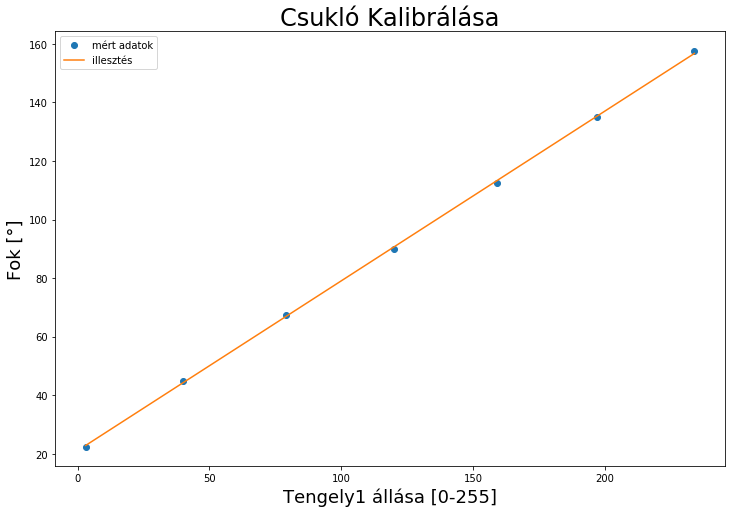

In [3]:
plt.figure(figsize=(12,8))
plt.plot(tengely1,szogek,linestyle='',marker='o',label='mért adatok')
plt.plot(tengely1,f_illeszt(tengely1,*popt),label='illesztés')
plt.xlabel('Tengely1 állása [0-255]',fontsize=18)
plt.ylabel('Fok [°]',fontsize=18)
plt.title('Csukló Kalibrálása',fontsize=24)
plt.legend()

print("A meredekség értéke ({} +/- {}) fok".format(popt[0],perr[0]))
print("Az y tengelymetszet értéke ({} +/- {}) fok".format(popt[1],perr[1]))

# 3. Visszaállási pontosság mérése - 3 pont

Csíptesse be a fogóba a lézert, irányozza az alaplap felé, majd kapcsolja be.

Keressen az alaplapont egy szimpatikus pontot, úgy hogy a lézer fénye vonalak metszetére vetüljün.

Mágnesek segítségével helyezzen ide egy lapot, és jelölje a fénypont helyét.

Rögzítse a jegyzőkönyvben a csuklók értékeit.

**PTP 002 161 128 128 128 255**

Végezzen több kísérletet, úgy, hogy az 1., 2., 3., 4. illetve 5. csuklókat a biztonsági zónán belül nagy mértékben elhangolja (kombinált elmozdítást is válasszon) majd visszaáll az eredetileg kiválasztott pozícióba. 
Minden visszaállás után jelölje a fénypont helyét.
Mérése alpján állapítsa meg milyen pontosság jellemző a robotra:

In [4]:
#Ezzel csak segítettem kiválasztani véletlenszerű elállításokat
import random
ran=[]
for i in range(5):
    ran.append(random.randint(0,255))
print(ran)

[209, 30, 29, 198, 110]


### A papírra rajzolt eltérések
A piros pont az alappont
<img src="20191122_121605.jpg" alt="visszaallas">

In [5]:
#3-szor ugyanarra a hibára állt rá
elteresek=[3,3,3,2,4,7,12] #mm

**Eredmény helye**

In [6]:
print('Átlagos eltérés = {} mm'.format(np.mean(elteresek)))
print('Szórás = {} mm'.format(np.std(elteresek)))

Átlagos eltérés = 4.857142857142857 mm
Szórás = 3.270149469217028 mm


Mi okozza a pontatlanságot?

A robotot tetszőleges pozícióba beállítva megfigyelhető, hogy a robot tengelyeinek van egy kicsi "kotyogása". Ezt a fogasszíj okozza, az egyes pozíciókat a fogasszíjak "medrei" adják, egy medren belül pedig a szerkezet tud mozogni egy bizonyos fokig.

Másik lehetőség, hogy egy tengely azonosbeállítási pozíciónál nem mindig ugyanabba a mederbe tér vissza.

# 4. Célpont keresése - 3 pont

A gyakorlatvezető segítségével rögzítsék mágnes segítségével az alaplapra a betűket és számokat tartalmazó lapot.
Keresse meg a lézer segítségével a neptun kódjának karaktereit, és adja meg a csuklóértékeket:

| karakter | PTP |
|----------|-----|
| 1. | 190 142 194 128 128 255 |
| 2. | 147 121 194 128 128 255 |
| 3. | 98 119 244 128 128 255 |
| 4. | 94 138 252 126 133 255 |
| 5. | 57 102 252 126 133 255 |
| 6. | 94 138 252 126 133 255 |

Neptunkódom: JE9Z6Z

# 5. Vezérlőprogram - 5 pont

Két feladat közül választhat:

* a gyakorlatvezető segítségével lerakott három téglatest áthelyezése úgy, hogy azok rendre a ciklikus permutációt követik, vagy
* egy kjelölt útat követ le a lézerfénnyel.

Egy kijelölt útvonalat követtem lézerfénnyel
<img src="robot.png" alt="progi">

# 6. Modell - 10 pont

A feladat három részből áll. 

1. A 2. feladathoz hasonlóan a többi csuklót is kalibrálni kellene. Igény esetén a gyakorlatvezető a többi csukló kalibrációs paramétereit megosztja. Ezek felhasználásával építse fel a robot valóságot közelítő pálcikamodelljét `python`ban.
2. Ellenőrizze a modellt az 1. feladat biztonsági csuklóparamétereivel.
3. Adjon eljárást, ami két térbeli pont között egyenes vonal mentén egyenletes sebességgel vezérelné